#This script pulls in WHO datasets for New cases and new deaths from COVID-19, builds and tests several predictive models, and subsequently makes predictions for mortality rates. A comparison is done between lockdown and social distancing approaches to the pandemic using the best model.

author = 'Dr Adaeze Nwobodo' email = 'AdaezeNwobodo@gmail.com'

#import library packages {caret/Dplyr/lubridate/mgcv/purrr/ranger/rpart/rpart.plot/sigr/tidyselect/tidyverse/
wrapr/base/broom/cluster/datasets/ellipsis/ggplot2/graphics/grDevices/highr/lattice/maggritr/methods/nlme/
readr/readxl/renv/stats/stringr/tibble/tidyr/utils}

In [ ]:
# DEFINE HELPER FUNCTIONS 

In [4]:
# 1
load_file <- function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}
    
print(load_file)

function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}


In [5]:
# 2
clean_data_nofullduplicates <- function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return (distinct(data_frame, keep_all = TRUE))
}
print(clean_data_nofullduplicates)

function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return (distinct(data_frame, keep_all = TRUE))
}


In [6]:
# 3 
clean_datanopartialduplicates <- function(data_frame) {
    #removes partial duplicates
   return (data_frame %>%
           count(Country) %>%
            filter(n > 1))
}
print(clean_datanopartialduplicates)

function(data_frame) {
    #removes partial duplicates
   return (data_frame %>%
           count(Country) %>%
            filter(n > 1))
}


In [7]:
# 4
get_levels <- function(data_frame) {
    #checks for levels within dataset
    return (levels(dataframe))
}
print(get_levels)

function(data_frame) {
    #checks for levels within dataset
    return (levels(dataframe))
}


In [8]:
third_quartile <- function(data_frame) {
    return (quantile(data_frame, 0.75))
}

In [9]:
first_quartile <- function(data_frame) {
    return (quantile(data_frame, 0.25))
}

In [10]:
# 5
get_wday_month <- function(data_frame) {
    #obtain separate weekday and month datasets from 'Date' column for use as independent variables
    return (data_frame %>%
        mutate(wday = wday(Date_reported, label = TRUE), month = month(Date_reported, label = TRUE)))
}
print(get_wday_month)

function(data_frame) {
    #obtain separate weekday and month datasets from 'Date' column for use as independent variables
    return (data_frame %>%
        mutate(wday = wday(Date_reported, label = TRUE), month = month(Date_reported, label = TRUE)))
}


In [11]:
# 6
calculate_test_train_split <- function(data_frame) {
    #split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
    round(N * 0.75) %>%
    gp <- runif(N)) %>%
    train_df <- data_frame[gp < 0.75, ]
    test_df <- data_frame[gp >= 0.75, ]
}
print(calculate_test_train_split)

function(data_frame) {
    #split the datasets into training(0.75) & test(0.25) set inputs for models
    return (N <- nrow(data_frame) %>%
    round(N * 0.75) %>%
    gp <- runif(N)) %>%
    train_df <- data_frame[gp < 0.75, ]
    test_df <- data_frame[gp >= 0.75, ]
}


In [12]:
# 7 
train_model_lm <- function(data_frame) {
    #train specific model-types using Country-specific datasets
    return (vars <- c("Cumulative_cases", "Cumulative_deaths", "wday", "month"))
    lm(New_deaths ~ vars, data = data_frame)
}
print(train_model_lm)

function(data_frame) {
    #train specific model-types using Country-specific datasets
    return (vars <- c("Cumulative_cases", "Cumulative_deaths", "wday", "month"))
    lm(New_deaths ~ vars, data = data_frame)
}


In [13]:
# 8
train_model_outputs <- function(model, train_df, test_df, num_procs, rmse, cv_std, cv = 2) {
    #trains all different model types (lm, random forest etc for comparable outputs)
    return (neg_mse = cross_val_score(model, train_df, test_df, cv = 2, n_jobs = num_procs, scoring = "neg_mean_squared_error")
    mean_mse[model] = -1.0*np.mean(neg_mse))
    cv_std[model] = np.std(neg_mse)
    RMSE[model] = sq.rt(mean(err ^ 2)) #error = WHO_COVID19$prediction - WHO_COVID19$New_deaths
    RSS[model] = sum(err ^ 2) #R ^ 2 / r-squared
}
print(train_model_outputs)

ERROR: Error in parse(text = x, srcfile = src): <text>:5:5: unexpected symbol
4:     return (neg_mse = cross_val_score(model, train_df, test_df, cv = 2, n_jobs = num_procs, scoring = "neg_mean_squared_error")
5:     mean_mse
       ^


In [14]:
# 9
print_summary <- function(model, mean_mse, cv_std) {
    #prints summary for each model that is trained to manually inspect outputs
    return 
    print(model(summary))
    print(rmse)
    print(RSS)
    print(cv_std)
}
print(print_summary)

function(model, mean_mse, cv_std) {
    #prints summary for each model that is trained to manually inspect outputs
    return 
    print(model(summary))
    print(rmse)
    print(RSS)
    print(cv_std)
}


In [15]:
# 10
save_results <- function(model, mean_mse, predictions, feature_importances) {
    #saves model, model summary, feature importances and predictions list with test dataset
}
print("save_results")

[1] "save_results"


if__name__ == '_main_':

In [16]:
library(dplyr)


Attaching package: 'dplyr'

The following object is masked from 'package:randomForest':

    combine

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [17]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [18]:
library(tidyr)

In [19]:
library(caret)

Loading required package: lattice


In [20]:
library(lubridate)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [21]:
library(purrr)


Attaching package: 'purrr'

The following object is masked from 'package:caret':

    lift



In [22]:
library(mgcv)

Loading required package: nlme

Attaching package: 'nlme'

The following object is masked from 'package:dplyr':

    collapse

This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


In [211]:
library(rpart)

In [212]:
install.packages("sigr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [213]:
library(sigr)

In [25]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x lubridate::as.difftime() masks base::as.difftime()
x nlme::collapse()         masks dplyr::collapse()
x dplyr::combine()         masks randomForest::combine()
x lubridate::date()        masks base::date()
x dplyr::filter()          masks stats::filter()
x lubridate::intersect()   masks base::intersect()
x dplyr::lag()             masks stats::lag()
x purrr::lift()            masks caret::lift()
x ggplot2::margin()        masks randomForest::margin()
x lubridate::setdiff()     masks base::setdiff()
x lubridate::union()       masks base::union()


In [26]:
library(tidyselect)

In [27]:
library(utils)

In [28]:
library(base)

In [29]:
library(broom)

In [30]:
library(cluster)

In [31]:
library(datasets)

In [32]:
library(ellipsis)

In [33]:
library(graphics)

In [34]:
library(grDevices)

In [35]:
library(highr)

In [36]:
library(lattice)

In [37]:
library(methods)

In [38]:
library(nlme)

In [39]:
library(readr)

In [40]:
library(readxl)

In [41]:
library(stats)

In [42]:
library(stringr)

In [43]:
install.packages('vtreat')

also installing the dependency 'wrapr'

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [44]:
library(vtreat)

Loading required package: wrapr

Attaching package: 'wrapr'

The following object is masked from 'package:tibble':

    view

The following object is masked from 'package:dplyr':

    coalesce



In [45]:
library(tibble)

In [46]:
install.packages('xgboost')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [47]:
library(xgboost)


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



In [48]:
library(randomForest)

In [181]:
library(magrittr)

In [184]:
install.packages('Metrics')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [192]:
library(Metrics)

In [194]:
WHO_COVID19 <- load_file("WHO-COVID-19-global-data.csv")

Parsed with column specification:
cols(
  Date_reported = col_character(),
  Country_code = col_character(),
  Country = col_character(),
  WHO_region = col_character(),
  New_cases = col_double(),
  Cumulative_cases = col_double(),
  New_deaths = col_double(),
  Cumulative_deaths = col_double()
)


In [195]:
head(WHO_COVID19)
nrow(WHO_COVID19)

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
03/01/2020,AF,Afghanistan,EMRO,0,0,0,0
04/01/2020,AF,Afghanistan,EMRO,0,0,0,0
05/01/2020,AF,Afghanistan,EMRO,0,0,0,0
06/01/2020,AF,Afghanistan,EMRO,0,0,0,0
07/01/2020,AF,Afghanistan,EMRO,0,0,0,0
08/01/2020,AF,Afghanistan,EMRO,0,0,0,0


[1] 71675

In [62]:
clean_data_nofullduplicates(WHO_COVID19)
#this shows no full duplicates exist in datasets 

keep_all
TRUE


In [63]:
clean_partial_data <- clean_datanopartialduplicates(WHO_COVID19)
clean_partial_data
#Shows 305 clean datasets in each of 235 countries. 

Country,n
Afghanistan,305
Albania,305
Algeria,305
American Samoa,305
Andorra,305
Angola,305
Anguilla,305
Antigua and Barbuda,305
Argentina,305
Armenia,305


In [64]:
nrow(clean_partial_data)

[1] 235

In [82]:
is.na(WHO_COVID19)

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [65]:
sum(is.na(WHO_COVID19))
#total number of missing values

[1] 610

In [96]:
filtered_WHO_COVID19 <- filter(WHO_COVID19, !is.na(Cumulative_cases), !is.na(Cumulative_deaths))
filtered_WHO_COVID19
nrow(filtered_WHO_COVID19)
#Code outputs imply that the missing values identified above are not present within the 'Cumulative Cases' or 'Cumulative deaths' columns used for predictions within the project

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
03/01/2020,AF,Afghanistan,EMRO,0,0,0,0
04/01/2020,AF,Afghanistan,EMRO,0,0,0,0
05/01/2020,AF,Afghanistan,EMRO,0,0,0,0
06/01/2020,AF,Afghanistan,EMRO,0,0,0,0
07/01/2020,AF,Afghanistan,EMRO,0,0,0,0
08/01/2020,AF,Afghanistan,EMRO,0,0,0,0
09/01/2020,AF,Afghanistan,EMRO,0,0,0,0
10/01/2020,AF,Afghanistan,EMRO,0,0,0,0
11/01/2020,AF,Afghanistan,EMRO,0,0,0,0
12/01/2020,AF,Afghanistan,EMRO,0,0,0,0


[1] 71675

In [97]:
# EXPLORATORY DATA ANALYSIS

In [98]:
#summarize dataset variables - 
#categorical_vars = {"Country_code", "Country", "WHO_region", "Date_reported"}
#numerical_vars = {"New_cases", "Cumulative_cases", "New_deaths", "Cumulative_deaths"}
#target_var = "Future_deaths" predictions

In [199]:
WHO_COVID19 %>% select(-Country_code)

head(WHO_COVID19)
#used code WHO_COVID19 %>% select(-Country_code) to remove country code - not essential for project work

Date_reported,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
03/01/2020,Afghanistan,EMRO,0,0,0,0
04/01/2020,Afghanistan,EMRO,0,0,0,0
05/01/2020,Afghanistan,EMRO,0,0,0,0
06/01/2020,Afghanistan,EMRO,0,0,0,0
07/01/2020,Afghanistan,EMRO,0,0,0,0
08/01/2020,Afghanistan,EMRO,0,0,0,0
09/01/2020,Afghanistan,EMRO,0,0,0,0
10/01/2020,Afghanistan,EMRO,0,0,0,0
11/01/2020,Afghanistan,EMRO,0,0,0,0
12/01/2020,Afghanistan,EMRO,0,0,0,0


Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
03/01/2020,AF,Afghanistan,EMRO,0,0,0,0
04/01/2020,AF,Afghanistan,EMRO,0,0,0,0
05/01/2020,AF,Afghanistan,EMRO,0,0,0,0
06/01/2020,AF,Afghanistan,EMRO,0,0,0,0
07/01/2020,AF,Afghanistan,EMRO,0,0,0,0
08/01/2020,AF,Afghanistan,EMRO,0,0,0,0


In [198]:
Top10cases_world_COVID19 <- WHO_COVID19 %>%
    group_by(Country) %>%
    summarise(total_cases = max(Cumulative_cases)) %>%
    top_n(10, total_cases)

Top10cases_world_COVID19
#top 10 cumulative cases worldwide of COVID19 infection by early November - 4 European countries (France, Russia, Spain & UK) on the list

Country,total_cases
Argentina,1166924
Brazil,5535605
Colombia,1074184
France,1381098
India,8229313
Mexico,924962
Russian Federation,1655034
Spain,1185678
The United Kingdom,1034918
United States of America,9032465


In [200]:
Top10deaths_world_COVID19 <- WHO_COVID19 %>%
    group_by(Country) %>%
    summarise(total_deaths = max(Cumulative_deaths)) %>%
    top_n(10, total_deaths)

Top10deaths_world_COVID19
#Top 10 cumulative deaths from COVID19 across the world by early November - 4 European countries (France, Italy, Spain & UK) on list

Country,total_deaths
Brazil,159884
France,36704
India,122607
Iran (Islamic Republic of),35298
Italy,38826
Mexico,91753
Peru,34476
Spain,35878
The United Kingdom,46717
United States of America,228998


In [70]:
WHO_COVID19_EURO <- WHO_COVID19 %>% filter(WHO_region == "EURO")
WHO_COVID19_EURO
nrow(WHO_COVID19_EURO)
#filters through all WHO regions to focus solely on European datasets

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
03/01/2020,AL,Albania,EURO,0,0,0,0
04/01/2020,AL,Albania,EURO,0,0,0,0
05/01/2020,AL,Albania,EURO,0,0,0,0
06/01/2020,AL,Albania,EURO,0,0,0,0
07/01/2020,AL,Albania,EURO,0,0,0,0
08/01/2020,AL,Albania,EURO,0,0,0,0
09/01/2020,AL,Albania,EURO,0,0,0,0
10/01/2020,AL,Albania,EURO,0,0,0,0
11/01/2020,AL,Albania,EURO,0,0,0,0
12/01/2020,AL,Albania,EURO,0,0,0,0


[1] 18910

Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message in FUN(X[[i]], ...):
"NAs introduced by coercion"Warning message:
"Removed 18910 rows containing missing values (geom_path)."

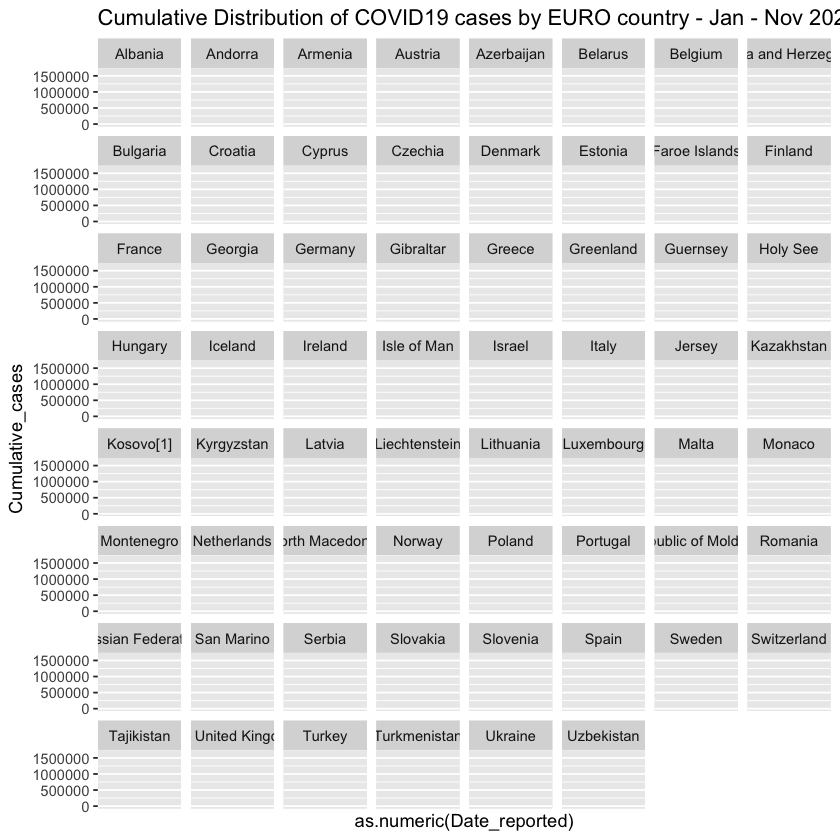

In [210]:
ggplot(WHO_COVID19_EURO, aes(x = as.numeric(Date_reported), y = Cumulative_cases)) + geom_line() + facet_wrap(~Country) +
    ggtitle("Cumulative Distribution of COVID19 cases by EURO country - Jan - Nov 2020")
#not showing line plots with visible spikes for 1st and 2nd waves in UK, France, Italy, Spain etc

In [74]:
WHO_COVID19_EURO_DATES <- WHO_COVID19_EURO %>%
    mutate(wday = wday(Date_reported, label = TRUE), month = month(Date_reported, label = TRUE))
head(WHO_COVID19_EURO_DATES)
#splits out the Date_reported column into 'wday' and 'month' columns

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,wday,month
03/01/2020,AL,Albania,EURO,0,0,0,0,Mon,Jan
04/01/2020,AL,Albania,EURO,0,0,0,0,Tue,Jan
05/01/2020,AL,Albania,EURO,0,0,0,0,Thu,Jan
06/01/2020,AL,Albania,EURO,0,0,0,0,Fri,Jan
07/01/2020,AL,Albania,EURO,0,0,0,0,Sat,Jan
08/01/2020,AL,Albania,EURO,0,0,0,0,Sun,Jan


In [151]:
#Can create model matrix code to demonstrate how R functions represent categorical variables internally prior to modelling

In [75]:
#Filtering through datasets to focus on German, Swedish and UK-specific datasets for project purposes
WHO_COVID19_GUS <- WHO_COVID19_EURO_DATES %>%
    filter(Country == "Germany" | Country == "The United Kingdom" | Country == "Sweden")
head(WHO_COVID19_GUS)
nrow(WHO_COVID19_GUS)

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,wday,month
03/01/2020,DE,Germany,EURO,0,0,0,0,Mon,Jan
04/01/2020,DE,Germany,EURO,0,0,0,0,Tue,Jan
05/01/2020,DE,Germany,EURO,0,0,0,0,Thu,Jan
06/01/2020,DE,Germany,EURO,0,0,0,0,Fri,Jan
07/01/2020,DE,Germany,EURO,0,0,0,0,Sat,Jan
08/01/2020,DE,Germany,EURO,0,0,0,0,Sun,Jan


[1] 915

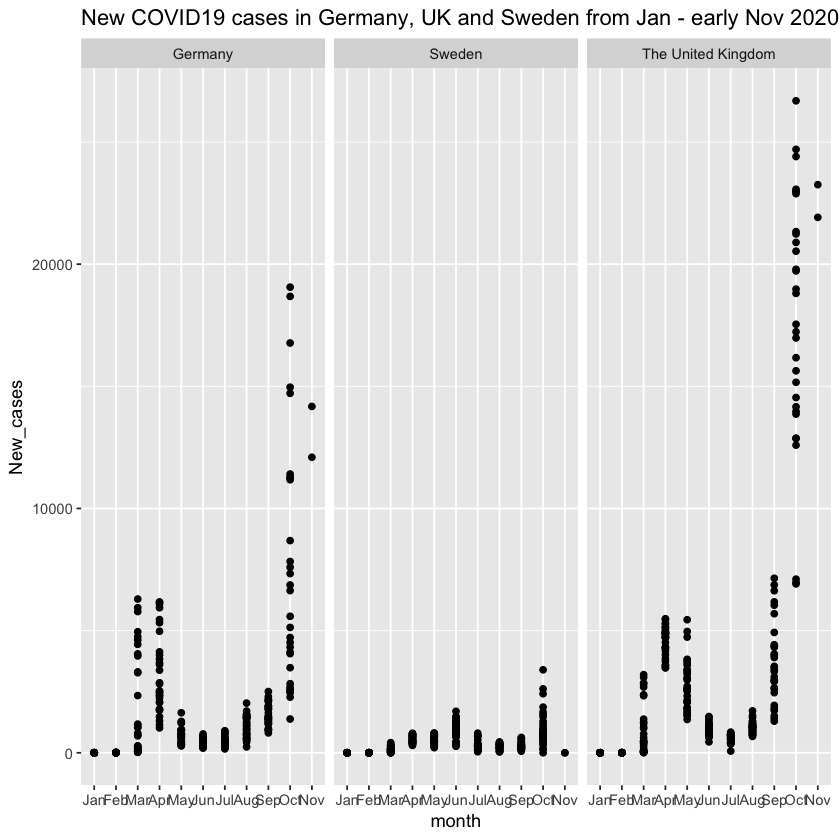

In [76]:
ggplot(WHO_COVID19_GUS, aes(month, New_cases)) + geom_point() + facet_wrap(~Country) + ggtitle ("New COVID19 cases in Germany, UK and Sweden from Jan - early Nov 2020")
#twin peaks observed for pandemic first wave between March and April and for subsequent pandemic second wave in Germany and UK between September & October. Smaller peaks in Sweden in June and October (with significantly lower population density than Germany or the UK)


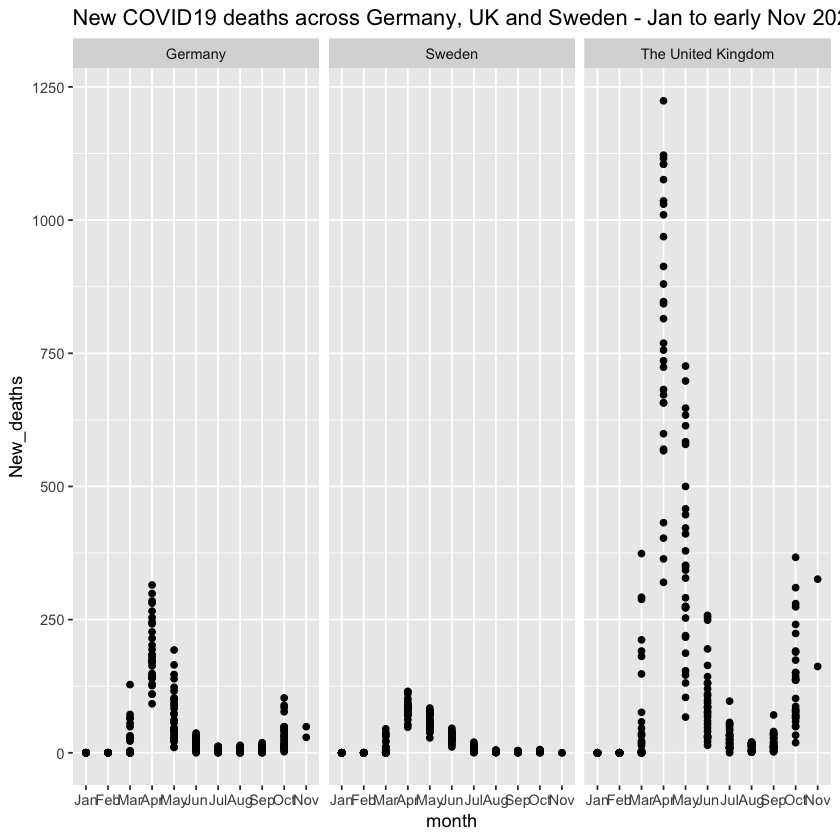

In [85]:
ggplot(WHO_COVID19_GUS, aes(month, New_deaths)) + geom_point() + facet_wrap(~Country) + ggtitle("New COVID19 deaths across Germany, UK and Sweden - Jan to early Nov 2020")
#similar curve to above (with first and second wave peaks for UK and Germany) but significantly higher peak in mortality rates in the UK compared with Germany. Peak in Swedish mortality rates in April

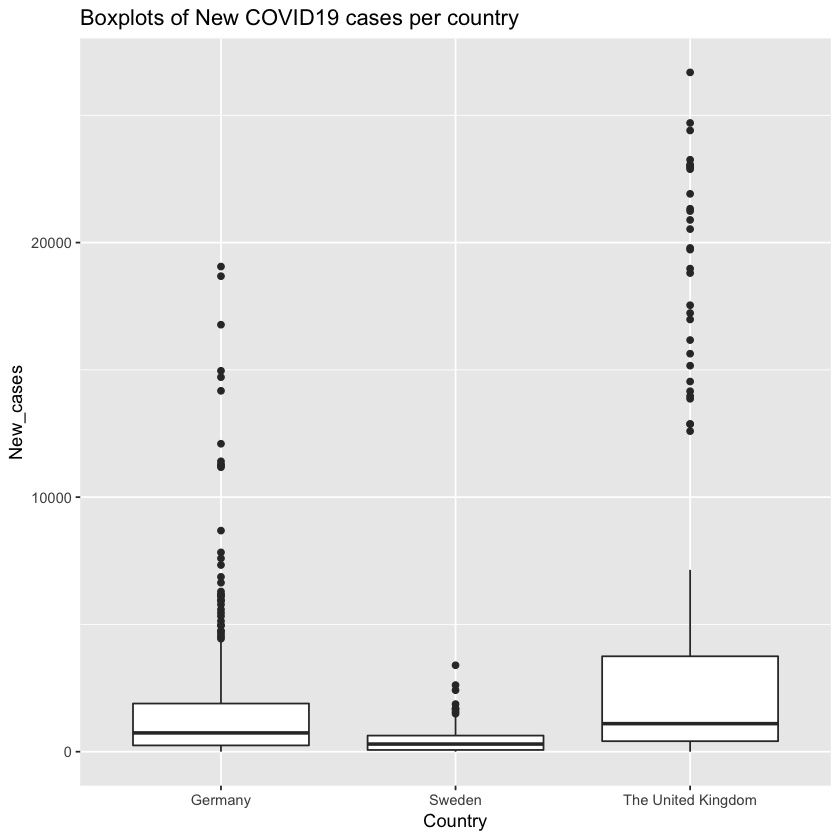

In [86]:
WHO_COVID19_GUS %>%
    ggplot(aes(Country, New_cases)) + geom_boxplot() + ggtitle("Boxplots of New COVID19 cases per country")
#Visual 5-data plots of New cases in all 3 countries. UK plot shows 1st quartile of 413, median = 1102, 3rd quartile = 3748, IQR = 3335 and outliers

Warning message:
"Removed 149 rows containing non-finite values (stat_boxplot)."

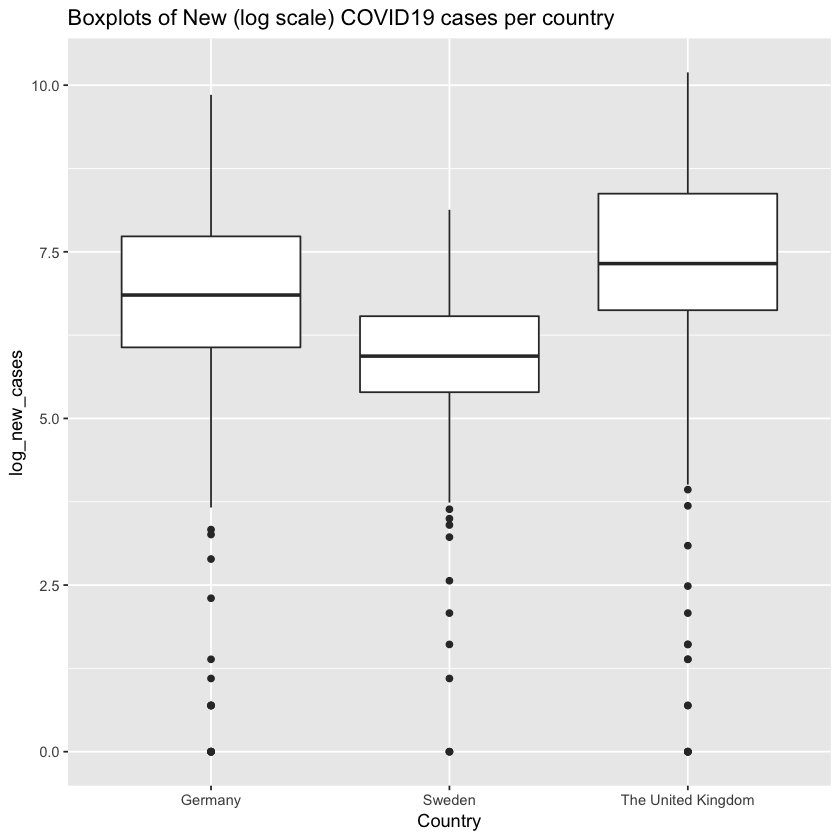

In [87]:
WHO_COVID19_GUS %>%
    mutate(log_new_cases = log(New_cases)) %>%
    ggplot(aes(Country, log_new_cases)) + geom_boxplot() + ggtitle("Boxplots of New (log scale) COVID19 cases per country")
#Log scale representation of same data above

In [155]:
WHO_COVID19_UK <- WHO_COVID19_GUS %>%
    filter(Country == "The United Kingdom")
head(WHO_COVID19_UK)
#Filtered out UK specific COVID19 datasets

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,wday,month
03/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Mon,Jan
04/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Tue,Jan
05/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Thu,Jan
06/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Fri,Jan
07/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Sat,Jan
08/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Sun,Jan


In [156]:
#Examined UK New Case outliers seen as values greater than 1.5 * the maximum value (1.5 * 3335 = 5002)
WHO_COVID19_UK

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,wday,month
03/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Mon,Jan
04/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Tue,Jan
05/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Thu,Jan
06/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Fri,Jan
07/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Sat,Jan
08/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Sun,Jan
09/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Tue,Jan
10/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Wed,Jan
11/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Thu,Jan
12/01/2020,GB,The United Kingdom,EURO,0,0,0,0,Fri,Jan


In [89]:
WHO_COVID19_Sweden <- WHO_COVID19_GUS %>%
    filter(Country == "Sweden")
head(WHO_COVID19_Sweden)

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,wday,month
03/01/2020,SE,Sweden,EURO,0,0,0,0,Mon,Jan
04/01/2020,SE,Sweden,EURO,0,0,0,0,Tue,Jan
05/01/2020,SE,Sweden,EURO,0,0,0,0,Thu,Jan
06/01/2020,SE,Sweden,EURO,0,0,0,0,Fri,Jan
07/01/2020,SE,Sweden,EURO,0,0,0,0,Sat,Jan
08/01/2020,SE,Sweden,EURO,0,0,0,0,Sun,Jan


In [90]:
median(WHO_COVID19_UK$Cumulative_cases)

[1] 258039

In [91]:
median(WHO_COVID19_UK$New_cases)

[1] 1102

In [92]:
median(WHO_COVID19_UK$Cumulative_deaths)

[1] 37780

In [93]:
median(WHO_COVID19_UK$New_deaths)
#all 4 cells above show *median* measure of new/cumulative cases/deaths in UK. Median used as measure of central spread here due to disproportional effect of 2nd wave of pandemic on data - data thus appears highly skewed

[1] 27

In [94]:
median(WHO_COVID19_Sweden$Cumulative_cases)

[1] 40203

In [95]:
median(WHO_COVID19_Sweden$New_cases)

[1] 300

In [96]:
median(WHO_COVID19_Sweden$Cumulative_deaths)

[1] 4712

In [97]:
median(WHO_COVID19_Sweden$New_deaths)

[1] 3

In [98]:
third_quartile_UK <- third_quartile(WHO_COVID19_UK$New_cases)
third_quartile_UK

75% 
3748

In [99]:
first_quartile_UK <- first_quartile(WHO_COVID19_UK$New_cases)
first_quartile_UK
#Difference between 3rd and 1st quartiles is the IQR (3748 - 413 = 3335)

25% 
413

In [100]:
IQR_UK <- IQR(WHO_COVID19_UK$New_cases)
IQR_UK
#Same as above for the UK

[1] 3335

In [101]:
#Outlier for UK will be Q1 - 1.5(IQR) to Q3 + 1.5(IQR) = (-4589.5 to 8750.5). Values lying outside of these boundaries are outliers for UK New cases
#this is confirmed visually in the UK boxplot. Repeat same calculation for outliers for Sweden. 

In [102]:
IQR(WHO_COVID19_Sweden$New_cases)
#IQR for Sweden is 564 vs that of UK at 3335 - reflective of the respective differences in population sizes (10 million vs 66 million - BUT what will that of Germany be?)

[1] 564

In [105]:
WHO_COVID19_UK %>%
    summarise(N = n(), r = cor(Cumulative_cases, Cumulative_deaths))
#Pearson's coefficient used to compute relationship between both variables. 0.82 suggests a strong +ve correlation between cumulative cases and cumulative deaths, which is sensible.

N,r
305,0.8226685


In [106]:
#Baseline outcomes - grouped by Country and found mean(Cumulative Deaths) for UK
#project is looking to assess the CUMULATIVE IMPACT of the pandemic on mortality rates in UK vs Sweden given the different policies applied (lockdown vs Social Distancing)
mean(WHO_COVID19_UK$Cumulative_deaths)

[1] 25840.91

In [214]:
#Baseline outcomes - grouped by Country and found mean(New Deaths) for UK
mean(WHO_COVID19_UK$New_deaths)

[1] 153.1705

In [ ]:
#MODELING SECTION

In [108]:
#Split datasets into Test/Train sets
N_UK <- nrow(WHO_COVID19_UK)
N_UK

[1] 305

In [109]:
#Number of rows of training data required for models
target_UK <- round(N_UK * 0.75)
target_UK

[1] 229

In [110]:
#Creating vector of N_UK uniform variables
gp_UK <- runif(N_UK)


In [111]:
#Create training set covid_trainUK (75% of data) & covid_testUK (25% of data)
covid_trainUK <- WHO_COVID19_UK[gp_UK < 0.75, ]
covid_testUK <- WHO_COVID19_UK[gp_UK >= 0.75, ]

In [112]:
#Examine covid_train and test datasets
nrow(covid_trainUK)
nrow(covid_testUK)

[1] 231

[1] 74

In [113]:
#fit a linear model (even though LOG scale of inputs yielded linear relationship)
model_UK <- lm(Cumulative_deaths ~ Cumulative_cases + month + wday, data = covid_trainUK)
glance(model_UK)
summary(model_UK)
#summary statistics show that the values for Cumulative cases and weekdays are positive, showing that Cumulative deaths will increase as both increase over time (with some positive and negative values for months, showing the rise in Cumulative deaths in the months with a rise in case numbers but a decline in deaths in months when case load under control.
#Also ?colinearity between months and weekdays
#R^2 value shows degree of correlation between the predictions and true outcomes of Cumulative deaths. Also shows how well model fits the data (how much variance it explains). True for training datat NOT for new data.

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9839462,0.9826649,2407.985,767.9353,1.063027e-180,18,-2117.097,4272.194,4337.6,1235056964,213



Call:
lm(formula = Cumulative_deaths ~ Cumulative_cases + month + wday, 
    data = covid_trainUK)

Residuals:
    Min      1Q  Median      3Q     Max 
-8739.0  -450.3     0.0   443.0  9937.7 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.106e+04  9.470e+02  22.238  < 2e-16 ***
Cumulative_cases  2.050e-02  3.025e-03   6.777 1.18e-10 ***
month.L           3.825e+04  3.023e+03  12.651  < 2e-16 ***
month.Q          -2.231e+04  1.632e+03 -13.671  < 2e-16 ***
month.C          -1.190e+04  1.317e+03  -9.035  < 2e-16 ***
month^4           1.097e+04  1.106e+03   9.914  < 2e-16 ***
month^5          -6.912e+02  7.776e+02  -0.889 0.375074    
month^6          -4.598e+03  6.870e+02  -6.694 1.90e-10 ***
month^7           4.949e+03  5.325e+02   9.293  < 2e-16 ***
month^8           4.754e+02  5.252e+02   0.905 0.366449    
month^9          -1.676e+03  4.938e+02  -3.394 0.000821 ***
month^10          1.343e+03  4.960e+02   2.708 0.007330 ** 
wday.L     

In [114]:
covid_testUK$prediction <- predict(model_UK, newdata = covid_testUK)
#creating a prediction column from the trained model

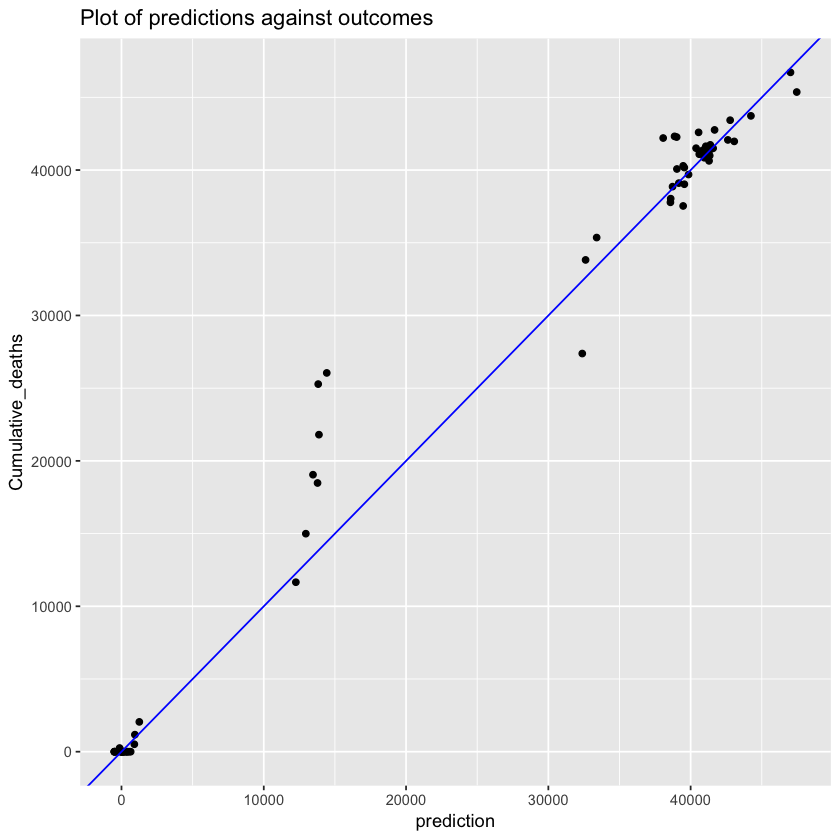

In [115]:
ggplot(covid_testUK, aes(x = prediction, y = Cumulative_deaths)) + geom_point() + geom_abline(color = "blue") + ggtitle("Plot of predictions against outcomes")

In [116]:
#Model above appears to be an ok fit (but not a perfect prediction) with an even distribution of errors above and below the line. Thus, likely no systematic errors (correlated with value of outcome). Issues with linear regression here include its inabiilty to express (& therefore inability to predict) complex, non-linear or non-additive relationships.   

In [117]:
#RMSE of the covid_model for TEST datasets
err_UK <- covid_testUK$prediction - covid_testUK$Cumulative_deaths
err_UK2 <- err_UK^2
RMSE_UK_test <- sqrt(mean(err_UK2))
RMSE_UK_test

[1] 2554.965

In [118]:
#Comparison of RMSE to sd
sd_UK <- sd(covid_testUK$Cumulative_deaths)
sd_UK

[1] 19253.62

In [119]:
#The RMSE with a prediction error of 2464 deaths is much smaller than the standard dev. at 18,579 deaths(typical diff between a specific Cumulative death dataset on a specific day, and the averge value of Cumulative deaths.
# The RMSE being smaller than the sd means that the model tends to estimate Cumulative deaths better than simply taking the average). This suggests it is a good model.

In [120]:
#predict Cumulative deaths from model training data (as did for test data above)
covid_trainUK$prediction_lin <- predict(model_UK)

In [122]:
#RMSE of the covid_model for TRAIN datasets
res_UK <- covid_trainUK$prediction_lin - covid_trainUK$Cumulative_deaths
res_UK2 <- res_UK^2
RMSE_UK_train <- sqrt(mean(res_UK2))
RMSE_UK_train

[1] 2312.264

In [123]:
#Comparison of RMSE values of model reveals slightly lower values on training data - suggesting model is slightly better at predicting Cumulative deaths on training data vs test data.

In [124]:
#Use of GAM to model a non-linear relationship between Cumulative deaths and Cumulative cases
gam_model_UK <- gam(Cumulative_deaths ~ s(Cumulative_cases) + wday + month, data = covid_trainUK, family = gaussian)
summary(gam_model_UK)


Family: gaussian 
Link function: identity 

Formula:
Cumulative_deaths ~ s(Cumulative_cases) + wday + month

Parametric coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26522.385     51.591 514.092  < 2e-16 ***
wday.L        -16.020     55.602  -0.288   0.7736    
wday.Q         63.688     54.798   1.162   0.2465    
wday.C         -4.256     54.890  -0.078   0.9383    
wday^4         10.105     53.994   0.187   0.8517    
wday^5         49.628     53.890   0.921   0.3582    
wday^6         24.734     53.255   0.464   0.6428    
month.L     -3408.553    750.830  -4.540 9.59e-06 ***
month.Q      1807.462    410.378   4.404 1.71e-05 ***
month.C       101.670    301.835   0.337   0.7366    
month^4      -565.379    249.519  -2.266   0.0245 *  
month^5      1198.635    182.127   6.581 3.82e-10 ***
month^6        73.202    176.775   0.414   0.6792    
month^7     -1132.912    129.310  -8.761 7.31e-16 ***
month^8        58.408    125.345   0.466   0.6417    
m

In [125]:
#Fit a GAM model above. for this data, the GAM appears to fit the data better than the linear model as measured by the adjusted R-squared


In [126]:
#Compare linear model and GAM predictions 

#Get predictions from linear model
covid_testUK$pred.lin <- predict(model_UK, newdata = covid_testUK)

#Get predictions from GAM model
covid_testUK$pred.gam <- as.numeric(predict(gam_model_UK, newdata = covid_testUK))


In [146]:
#contd - gather predictions into a "long" dataset
covid_longUK <- covid_testUK %>%
    gather(key = modeltype, value = pred, pred.lin, pred.gam, pred.rf, pred.xgb)

In [147]:
#contd - calculate rmse
covid_longUK %>%
    mutate(residual = Cumulative_deaths - pred) %>%    
    #residuals
    group_by(modeltype) %>%
    #group by modeltype
    summarise(rmse = sqrt(mean(residual^2)))
    #calculate the rmse

modeltype,rmse
pred.gam,371.0353
pred.lin,2554.9649
pred.rf,1281.9869
pred.xgb,260.2072


In [148]:
#Outputs above show the GBM model fit the test data better than the other 3 models as its predictions have the lowest RMSE.

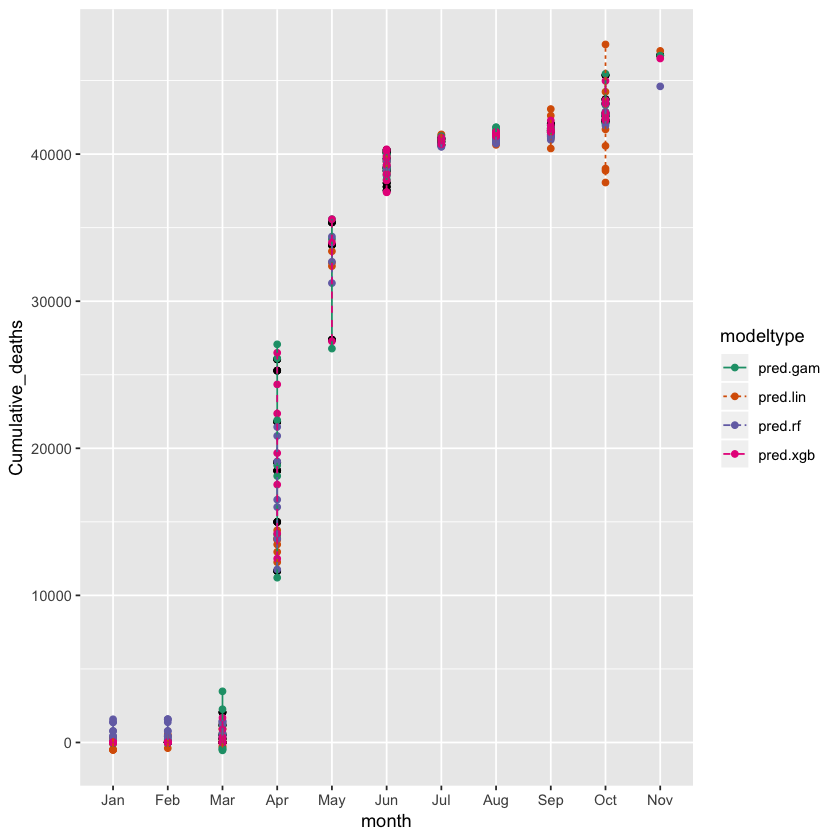

In [149]:
#Compare the predictions against actual weights on the test data
covid_longUK %>%
    ggplot(aes(x = month)) + geom_point(aes(y = Cumulative_deaths)) + geom_point(aes(y = pred, color = modeltype)) + geom_line(aes(y = pred, color = modeltype, linetype = modeltype)) + scale_color_brewer(palette = "Dark2")

In [269]:
#Interpretation of graph above - the GAM model learns the non-linear relationship between Cumulative cases and Cumulative deaths over time - and is thus a better predictor of outcome than the linear model. 

In [159]:
#Train a random forest model
set.seed(1) # for reproducibility
#fit the random forest model
rf_model_UK <- randomForest(Cumulative_deaths ~ Cumulative_cases + month + wday, covid_trainUK, num.trees = 500, respect.unordered.factors = "order", seed = seed)
rf_model_UK


Call:
 randomForest(formula = Cumulative_deaths ~ Cumulative_cases +      month + wday, data = covid_trainUK, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 1572158
                    % Var explained: 99.53

In [151]:
#Use the random forest model to make predictions on the covid_testUK datasets
covid_testUK$pred.rf <- predict(rf_model_UK, newdata = covid_testUK)
#used to compare with GAM and linear model outputs - showing GAM model currently outperforming the other two, with the lowest rmse.
#need to tune no. of estimators, max. depth and max features of rf model to improve performance.

In [153]:
#Calculate the RMSE of the predictions
covid_testUK %>% mutate(residual = Cumulative_deaths - pred.rf) %>% summarise(rmse = sqrt(mean(residual^2)))

rmse
1281.987


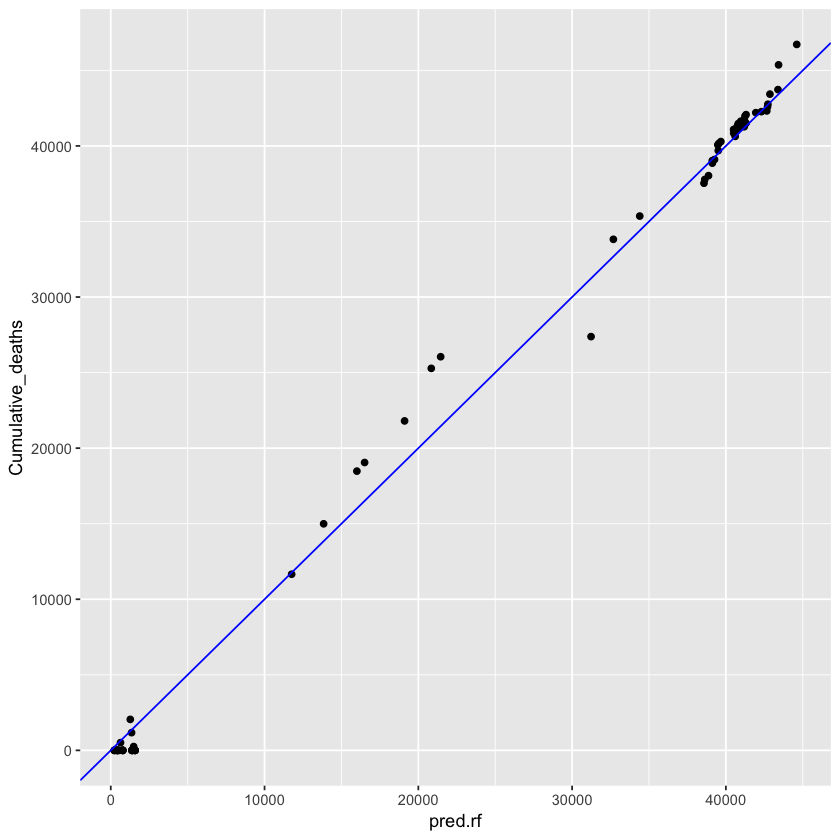

In [154]:
#Graph of actual outcome vs predictions
ggplot(covid_testUK, aes(x = pred.rf, y = Cumulative_deaths)) + geom_point() + geom_abline(color = "blue")

In [164]:
#Tuning Random Forest model parameters - 
#1. Number of trees increased from 200 to 500 - resulting drop in rmse from 1420 to 1357. More trees = better performance in RF 

In [170]:
#Generate a grid of hyperparameter values 

#Establish a list of possible values for minsplit and maxdepth
minsplit <- seq(1, 4, 1)
maxdepth <- seq(1, 6, 1)

#Create a data frame containing all combinations
hyper_grid <- expand.grid(minsplit = minsplit, maxdepth = maxdepth)

#Check out the grid
head(hyper_grid)

#Print the number of grid combinations
nrow(hyper_grid)

minsplit,maxdepth
1,1
2,1
3,1
4,1
1,2
2,2


[1] 24

NULL

NULL


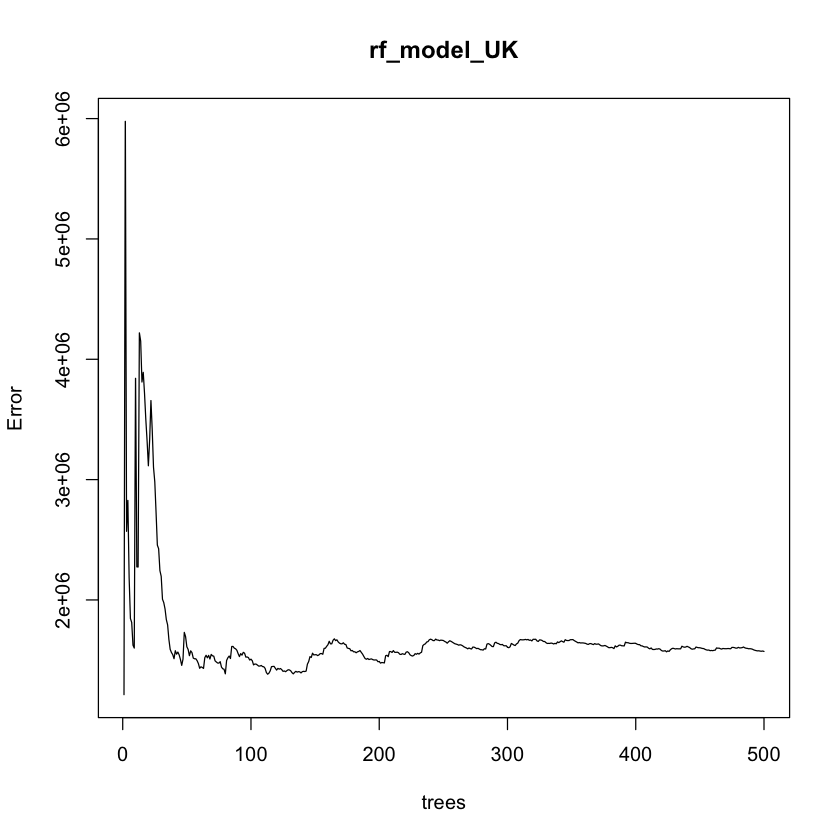

In [175]:
#Plot OOB error as a function of the number of trees trained, and extract final OOB error of RF model from trained model object

#Grab OOB error matrix and view
err <- rf_model_UK$err.rate
head(err)

#Look at final OOB error rate (last row in err matrix)
oob_err <- err[nrow(err), "OOB"]
print(oob_err)

#Plot the model trained above
plot(rf_model_UK)

In [215]:
#Tuning the Random Forest via mtry

#Execute the tuning process
set.seed(1)
res <- tuneRF(x = subset(covid_trainUK, y = covid_trainUK$Cumulative_deaths, ntreeTry = 500)

ERROR: Error in parse(text = x, srcfile = src): <text>:6:0: unexpected end of input
4: set.seed(1)
5: res <- tuneRF(x = subset(covid_trainUK, y = covid_trainUK$Cumulative_deaths, ntreeTry = 500)
  ^


In [169]:
#Generate a grid of models - write simple loop to train "grid" of models

#Number of potential models in the grid
num_models <- nrow(hyper_grid)

#Create an empty list to store models
grade_models <- list()

#Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:num_models) {
    
    #Get minsplit, maxdepth values at row i
    minsplit <- hyper_grid$minsplit[i]
    maxdepth <- hyper_grid$maxdepth[i]
    
    #Train a model and store it in the list 
    grade_models[[i]] <- randomForest(formula = Cumulative_deaths ~ Cumulative_cases + month + wday, data = covid_trainUK, minsplit = minsplit, maxdepth = maxdepth)
}

In [191]:
#****INCORRECT AS USED FOR RF CLASSIFICATION MODELS NOT REGRESSION. Evaluation of Predictive Performance of Random Forest Model using AUC (Area under receiver operating Curve) 

class(covid_testUK$pred.rf)

head(covid_testUK$pred.rf)

#Compute the AUC 
auc(actual = ifelse(covid_testUK$Cumulative_deaths == "yes", 1, 0), predicted = covid_testUK$pred.rf[, "yes"])

[1] "numeric"

[1]  438.1652 1374.7645  778.8151  232.9071 1577.9795 1374.7645

ERROR: Error in covid_testUK$pred.rf[, "yes"]: incorrect number of dimensions


In [163]:
#Tuning Random Forest parameters
#Establish a list of possible values for mtry, nodesize and sampsize
mtry <- seq(4, ncol(covid_trainUK) * 0.8, 2)
nodesize <- seq(3, 8, 2)
sampsize <- nrow(covid_trainUK) * c(0.7, 0.8)

#Create a data frame containing all combinations
hyper_grid <- expand.grid(mtry = mtry, nodesize = nodesize, sampsize = sampsize)

#Create an empty vector to store OOB error values
oob_err <- c()

#Write a loop over the rows of hyper_grid to train the grid of models
for (i in 1:nrow(hyper_grid)) {
    
    #Train a Random Forest model
    model <- randomForest(formula = Cumulative_deaths ~ .,
                         data = covid_trainUK,
                          mtry = hyper_grid$mtry[i],
                         nodesize = hyper_grid$nodesize[i],
                         sampsize = hyper_grid$sampsize[i])
    
    #Store OOB error for the model
    oob_err[i] <- model$err.rate[nrow(model$err.rate), "OOB"]
}

#Identify optimal set of hyperparameters based on OOB error
opt_i <- which.min(oob_err)
print(hyper_grid[opt_i,])

Warning message in data.matrix(x):
"NAs introduced by coercion"Warning message in data.matrix(x):
"NAs introduced by coercion"Warning message in data.matrix(x):
"NAs introduced by coercion"Warning message in data.matrix(x):
"NAs introduced by coercion"Warning message in matrix(integer(nrnodes * nt), ncol = nt):
"data length [162200] is not a sub-multiple or multiple of the number of rows [325]"Warning message in matrix(integer(nrnodes * nt), ncol = nt):
"data length [162200] is not a sub-multiple or multiple of the number of rows [325]"Warning message in matrix(integer(nrnodes * nt), ncol = nt):
"data length [162200] is not a sub-multiple or multiple of the number of rows [325]"Warning message in matrix(double(nrnodes * nt), ncol = nt):
"data length [162200] is not a sub-multiple or multiple of the number of rows [325]"Warning message in matrix(integer(nrnodes * nt), ncol = nt):
"data length [162200] is not a sub-multiple or multiple of the number of rows [325]"Warning message in matri

ERROR: Error in randomForest.default(m, y, ...): NA/NaN/Inf in foreign function call (arg 1)


In [353]:
#Tuning Random Forest hyperparameters (mtry)

#Create model with defult parameters
control <- trainControl(method="repeatedcv", number=10, repeats=3)
seed <- 7
metric <- "Accuracy"
set.seed(seed)
mtry <- sqrt(ncol(covid_trainUK))
tunegrid <- expand.grid(.mtry=mtry)
rf_default <- train(Cumulative_deaths~., data=WHO_COVID19_UK, method="rf", metric=metric, tuneGrid=tunegrid, trControl=control)
print(rf_default)

ERROR: Error: Metric Accuracy not applicable for regression models


In [136]:
# Tuning Random Forest hyperparameters

#Random Search
control <- trainControl(method="repeatedcv", number=10, repeats=3, search="random")
set.seed(seed)
mtry <- sqrt(ncol(covid_trainUK))
rf_random <- train(Class~., data=WHO_COVID19_UK, method="rf", metric=metric, tunelength=15, trControl=control)
print(rf_random)
plot(rf_random)

ERROR: Error in set.seed(seed): object 'seed' not found


In [137]:
#Algorithm Tune (tuneRF)
set.seed(seed)
bestmtry <- tuneRF(covid_trainUK, covid_testUK, stepFactor=1.5, improve=1e-5, ntree=500)
print(bestmtry)

ERROR: Error in set.seed(seed): object 'seed' not found


In [138]:
#Gradient Boosting Model
#One-hot encoding categorical variables into numeric variables

#Create a vector of variables
vars <- c("Cumulative_cases", "Month", "wday")

#Create the treatment plan
treatplan <- designTreatmentsZ(covid_trainUK, vars, verbose = FALSE)

#Examine scoreframe and get the new variables
(scoreFrame <- treatplan %>%
     use_series(scoreFrame) %>%
    select(varName, origName, code))

#Selecting only for rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
     filter(code %in% c("clean", "lev")) %>%
     use_series(varName))

#Create the treated training data
(covid_train.treat <- prepare(treatplan, covid_trainUK, varRestriction = newvars))

#Calling str() on the treated data
str(covid_train.treat)

varName,origName,code
Cumulative_cases,Cumulative_cases,clean
wday_catP,wday,catP
wday_lev_x_Fri,wday,lev
wday_lev_x_Mon,wday,lev
wday_lev_x_Sat,wday,lev
wday_lev_x_Sun,wday,lev
wday_lev_x_Thu,wday,lev
wday_lev_x_Tue,wday,lev
wday_lev_x_Wed,wday,lev


[1] "Cumulative_cases" "wday_lev_x_Fri"   "wday_lev_x_Mon"   "wday_lev_x_Sat"  
[5] "wday_lev_x_Sun"   "wday_lev_x_Thu"   "wday_lev_x_Tue"   "wday_lev_x_Wed"

Cumulative_cases,wday_lev_x_Fri,wday_lev_x_Mon,wday_lev_x_Sat,wday_lev_x_Sun,wday_lev_x_Thu,wday_lev_x_Tue,wday_lev_x_Wed
0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,1,0,0
0,1,0,0,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,1
0,0,0,0,0,1,0,0
0,0,0,0,0,0,1,0


'data.frame':	231 obs. of  8 variables:
 $ Cumulative_cases: num  0 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Fri  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ wday_lev_x_Mon  : num  1 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Sat  : num  0 0 0 0 1 0 0 0 0 0 ...
 $ wday_lev_x_Sun  : num  0 0 0 0 0 1 0 0 0 0 ...
 $ wday_lev_x_Thu  : num  0 0 1 0 0 0 0 0 1 0 ...
 $ wday_lev_x_Tue  : num  0 1 0 0 0 0 1 0 0 1 ...
 $ wday_lev_x_Wed  : num  0 0 0 0 0 0 0 1 0 0 ...


In [139]:
#One hot encoding of categorical variables above - with new indicator variables containing '_lev_' in their names and new cleaned continuous variables have '_clean' in their names. The treated data is all numerical, with no missing values, and is suitable for use with xgboost and other R modelling functions.

In [140]:
#Use prepare() to one-hot-encode test data - to prepare it as trained data before model application
#Create the treated test data
(covid_test.treat <- prepare(treatplan, covid_testUK, varRestriction = newvars))

#Calling str() on the treated test data
str(covid_test.treat)

Cumulative_cases,wday_lev_x_Fri,wday_lev_x_Mon,wday_lev_x_Sat,wday_lev_x_Sun,wday_lev_x_Thu,wday_lev_x_Tue,wday_lev_x_Wed
0,1,0,0,0,0,0,0
0,0,0,0,1,0,0,0
0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1
0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0
0,1,0,0,0,0,0,0
0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0


'data.frame':	74 obs. of  8 variables:
 $ Cumulative_cases: num  0 0 0 0 0 0 0 0 2 3 ...
 $ wday_lev_x_Fri  : num  1 0 0 0 0 0 1 0 0 0 ...
 $ wday_lev_x_Mon  : num  0 0 1 0 0 0 0 1 0 0 ...
 $ wday_lev_x_Sat  : num  0 0 0 0 1 0 0 0 0 0 ...
 $ wday_lev_x_Sun  : num  0 1 0 0 0 1 0 0 0 1 ...
 $ wday_lev_x_Thu  : num  0 0 0 0 0 0 0 0 1 0 ...
 $ wday_lev_x_Tue  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Wed  : num  0 0 0 1 0 0 0 0 0 0 ...


In [141]:
#Data above is now in completely numeric forma and ready to use with xgboost model. Treated data does not contain outcome column.

In [142]:
#Running the Gradient Boosting Machine model

#Run xgb.cv
cv <- xgb.cv(data = as.matrix(covid_train.treat), label = covid_trainUK$Cumulative_deaths, nrounds = 100, nfold = 5, objective = "reg:linear", eta = 0.3, max_depth = 6, early_stopping_rounds = 10, verbose = 0)

#Get the evaluation log
elog <- as.data.frame(cv$evaluation_log)

#Determine and print how many trees minimise training and test error
elog %>%
    summarise(ntrees.train = which.min(train_rmse_mean),
             ntrees.test = which.min(test_rmse_mean))

[16:23:40] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:40] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:40] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:40] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:23:40] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


ntrees.train,ntrees.test
100,100


In [143]:
#use of cross validtion to find the right number of trees above (as determined by ntrees.test) avoids risk of overfit model

[16:24:57] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[16:24:57] WARNING: amalgamation/../src/learner.cc:541: 
Parameters: { depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




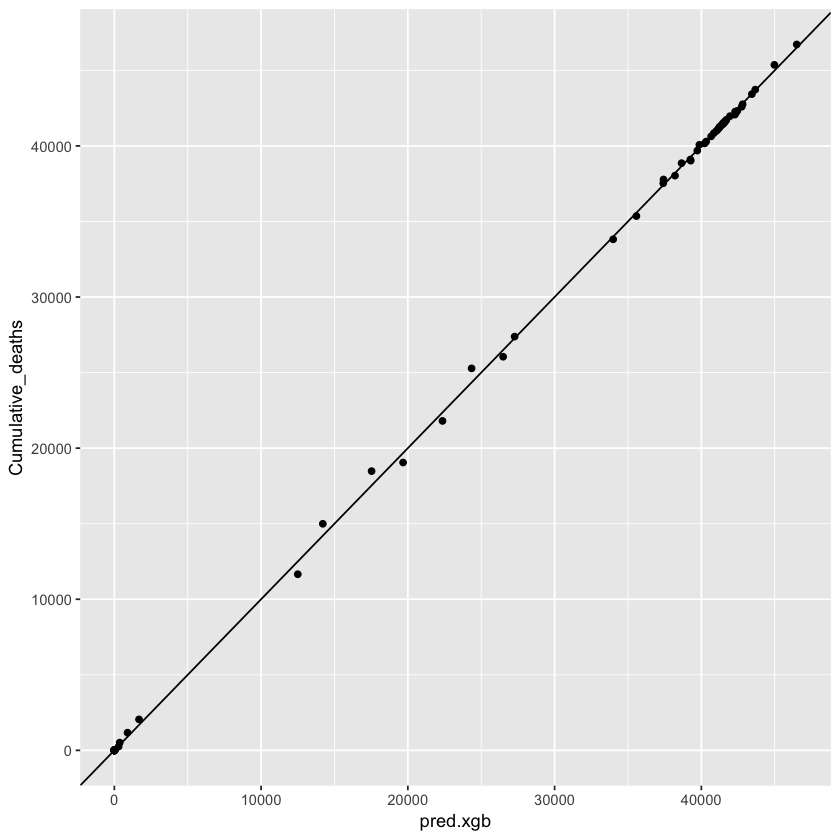

In [145]:
#Fit an xgboost model and predict

#the number of trees to use as determined by xgb.cv (ntrees = 100)

#Run xgboost
covid_UKmodel_xgb <- xgboost(data = as.matrix(covid_train.treat), label = covid_trainUK$Cumulative_deaths, nrounds = 100, objective = "reg:linear", eta = 0.3, depth = 6, verbose = 0)

#Make predictions
covid_testUK$pred.xgb <- predict(covid_UKmodel_xgb, as.matrix(covid_test.treat))

#Plot predictions (on x axis vs actual Cumulative deaths count)
ggplot(covid_testUK, aes(x = pred.xgb, y = Cumulative_deaths)) + geom_point() + geom_abline()

In [381]:
#Comparison of Gradient Boost model predictions (x-axis) to the actual Cumulative deaths in the test datasets (y-axis). Overall, scatterplot above shows a great fit between model and test data

In [386]:
# REPEAT ABOVE PROCESS - FOR SWEDEN-SPECIFIC DATASETS
#Split datasets into Test/Train sets
N_Sweden <- nrow(WHO_COVID19_Sweden)
N_Sweden

#Number of rows of training data required for models
target_Sweden <- round(N_Sweden * 0.75)
target_Sweden

#Creating vector of N_Sweden uniform variables 
gp_Sweden <- runif(N_Sweden)

#Create training set covid_trainSweden (75% of data) and covid_testSweden (25% of data)
covid_trainSweden <- WHO_COVID19_Sweden[gp_Sweden < 0.75, ]
covid_testSweden <- WHO_COVID19_Sweden[gp_Sweden >= 0.75, ]

#Examine covidtrainSweden and test datasets
nrow(covid_trainSweden)
nrow(covid_testSweden)

[1] 305

[1] 229

[1] 227

[1] 78

In [387]:
#Fit a Gradient Boosting model specific for Sweden
#Gradient Boosting Model
#One-hot encoding categorical variables into numeric variables

#Create a vector of variables
vars <- c("Cumulative_cases", "Month", "wday")

#Create the treatment plan
treatplan <- designTreatmentsZ(covid_trainUK, vars, verbose = FALSE)

#Examine scoreframe and get the new variables
(scoreFrame <- treatplan %>%
     use_series(scoreFrame) %>%
    select(varName, origName, code))

#Selecting only for rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
     filter(code %in% c("clean", "lev")) %>%
     use_series(varName))

#Create the treated training data
(covid_trainSweden.treat <- prepare(treatplan, covid_trainSweden, varRestriction = newvars))

#Calling str() on the treated data
str(covid_trainSweden.treat)

varName,origName,code
Cumulative_cases,Cumulative_cases,clean
wday_catP,wday,catP
wday_lev_x_Fri,wday,lev
wday_lev_x_Mon,wday,lev
wday_lev_x_Sat,wday,lev
wday_lev_x_Sun,wday,lev
wday_lev_x_Thu,wday,lev
wday_lev_x_Tue,wday,lev
wday_lev_x_Wed,wday,lev


[1] "Cumulative_cases" "wday_lev_x_Fri"   "wday_lev_x_Mon"   "wday_lev_x_Sat"  
[5] "wday_lev_x_Sun"   "wday_lev_x_Thu"   "wday_lev_x_Tue"   "wday_lev_x_Wed"

Cumulative_cases,wday_lev_x_Fri,wday_lev_x_Mon,wday_lev_x_Sat,wday_lev_x_Sun,wday_lev_x_Thu,wday_lev_x_Tue,wday_lev_x_Wed
0,0,1,0,0,0,0,0
0,0,0,0,0,0,1,0
0,1,0,0,0,0,0,0
0,0,0,1,0,0,0,0
0,0,0,0,1,0,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,1
0,0,0,0,1,0,0,0
0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,1


'data.frame':	227 obs. of  8 variables:
 $ Cumulative_cases: num  0 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Fri  : num  0 0 1 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Mon  : num  1 0 0 0 0 0 0 0 1 0 ...
 $ wday_lev_x_Sat  : num  0 0 0 1 0 0 0 0 0 0 ...
 $ wday_lev_x_Sun  : num  0 0 0 0 1 0 0 1 0 0 ...
 $ wday_lev_x_Thu  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Tue  : num  0 1 0 0 0 1 0 0 0 0 ...
 $ wday_lev_x_Wed  : num  0 0 0 0 0 0 1 0 0 1 ...


In [388]:
#Use prepare() to one-hot-encode test data - to prepare it as trained data before model application
#Create the treated test data
(covid_testSweden.treat <- prepare(treatplan, covid_testSweden, varRestriction = newvars))

#Calling str() on the treated test data
str(covid_testSweden.treat)

Cumulative_cases,wday_lev_x_Fri,wday_lev_x_Mon,wday_lev_x_Sat,wday_lev_x_Sun,wday_lev_x_Thu,wday_lev_x_Tue,wday_lev_x_Wed
0,0,0,0,0,1,0,0
0,0,0,0,0,1,0,0
0,1,0,0,0,0,0,0
0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0


'data.frame':	78 obs. of  8 variables:
 $ Cumulative_cases: num  0 0 0 0 0 1 1 1 1 1 ...
 $ wday_lev_x_Fri  : num  0 0 1 0 0 0 0 1 0 0 ...
 $ wday_lev_x_Mon  : num  0 0 0 0 0 0 0 0 1 0 ...
 $ wday_lev_x_Sat  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Sun  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ wday_lev_x_Thu  : num  1 1 0 0 0 0 0 0 0 1 ...
 $ wday_lev_x_Tue  : num  0 0 0 1 0 0 1 0 0 0 ...
 $ wday_lev_x_Wed  : num  0 0 0 0 1 1 0 0 0 0 ...


In [390]:
#Running the Gradient Boosting Machine model

#Run xgb.cv
cv <- xgb.cv(data = as.matrix(covid_trainSweden.treat), label = covid_trainSweden$Cumulative_deaths, nrounds = 100, nfold = 5, objective = "reg:linear", eta = 0.3, max_depth = 6, early_stopping_rounds = 10, verbose = 0)

#Get the evaluation log
elog <- as.data.frame(cv$evaluation_log)

#Determine and print how many trees minimise training and test error
elog %>%
    summarise(ntrees.train = which.min(train_rmse_mean),
             ntrees.test = which.min(test_rmse_mean))

[15:26:25] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:25] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:25] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:25] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:26:25] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


ntrees.train,ntrees.test
40,30


[15:34:33] WARNING: amalgamation/../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:34:33] WARNING: amalgamation/../src/learner.cc:516: 
Parameters: { depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




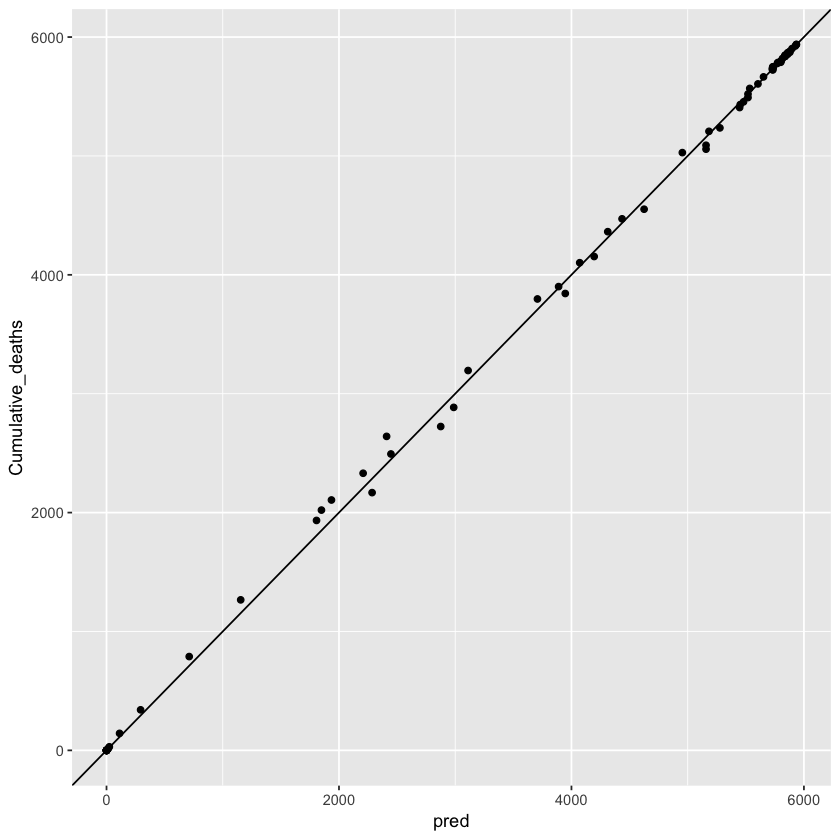

In [393]:
#Fit an xgboost model and predict

#the number of trees to use as determined by xgb.cv (ntrees = 100)

#Run xgboost
covid_Swedenmodel_xgb <- xgboost(data = as.matrix(covid_trainSweden.treat), label = covid_trainSweden$Cumulative_deaths, nrounds = 30, objective = "reg:linear", eta = 0.3, depth = 6, verbose = 0)

#Make predictions
covid_testSweden$pred.xgb <- predict(covid_Swedenmodel_xgb, as.matrix(covid_testSweden.treat))

#Plot predictions (on x axis vs actual Cumulative deaths count)
ggplot(covid_testSweden, aes(x = pred, y = Cumulative_deaths)) + geom_point() + geom_abline()

In [ ]:
#Graph above shows a near perfect fit between the model predictions and the Cumulative deaths within the test datasets